# OH - 11 - EDA

Objectives of EDA:

- Discover patterns
- Spot anomalies
- Frame hypothesis
- Check assumptions

Common methods:

- Univariate analysis
- Multivariate analysis

In [1]:
# import libraries and data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Load the data
df = pd.read_csv("houses.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
# How many numerical columns
df.select_dtypes(include=np.number).shape[1]

38

In [7]:
# How many categorical columns
df.select_dtypes(include=object).shape[1]

43

In [8]:
sale_price = df["SalePrice"]

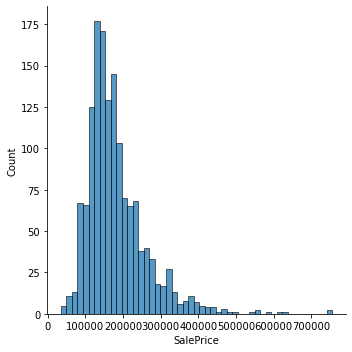

In [9]:
sns.displot(sale_price, kde=False)

<AxesSubplot:xlabel='SalePrice'>

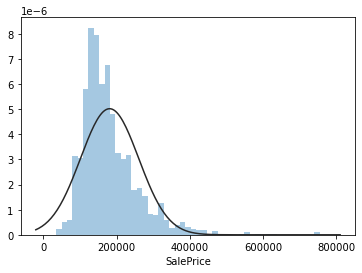

In [10]:
sns.distplot(sale_price, kde=False, fit=stats.norm)

<AxesSubplot:xlabel='SalePrice'>

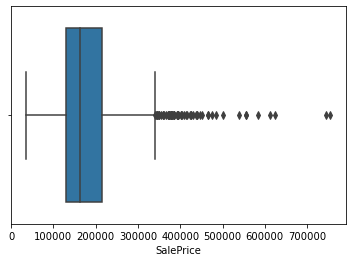

In [11]:
sns.boxplot(sale_price)

In [12]:
num_var = df.select_dtypes(include=np.number)

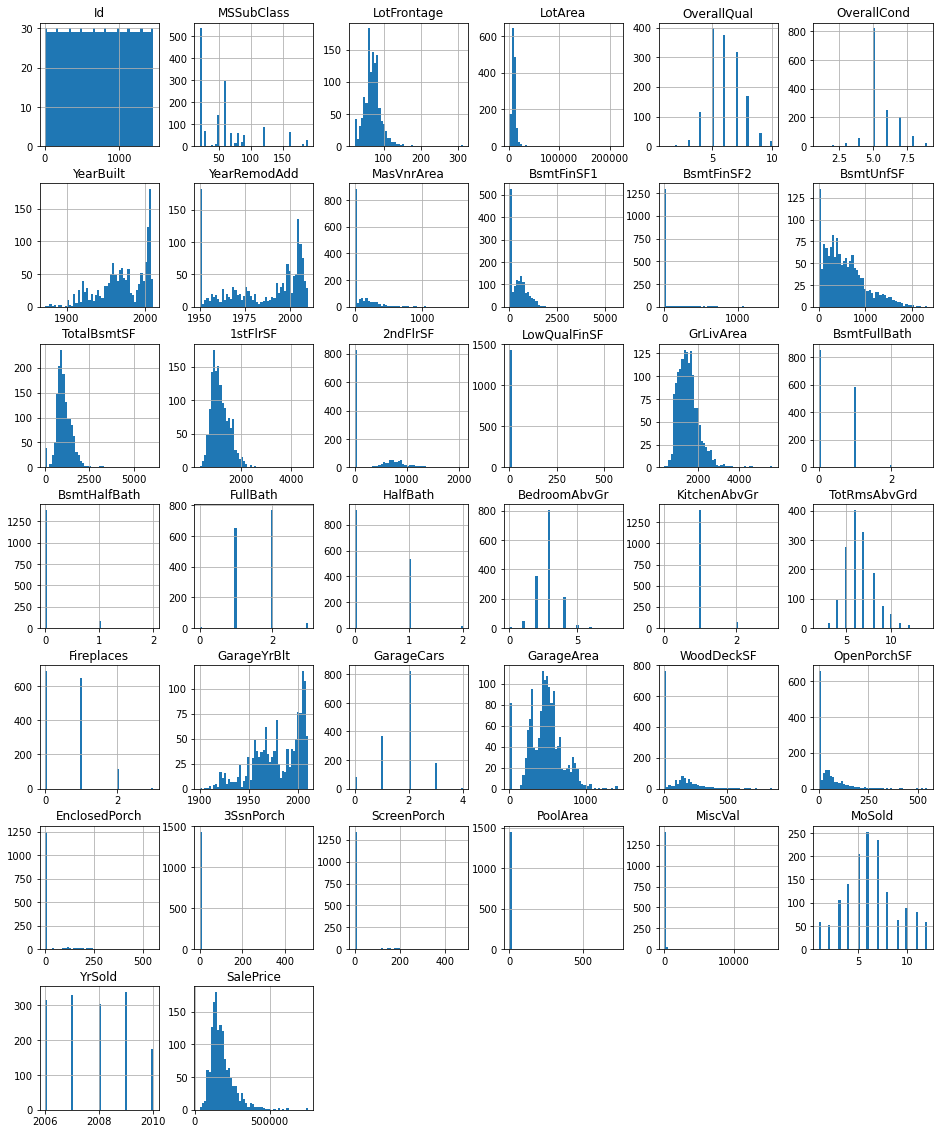

In [13]:
num_var.hist(figsize=(16,20), bins=50)
plt.show()

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1152x1440 with 0 Axes>

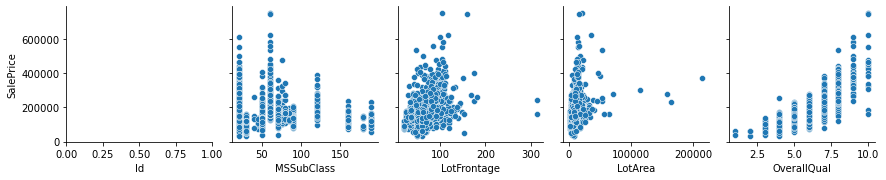

<Figure size 1152x1440 with 0 Axes>

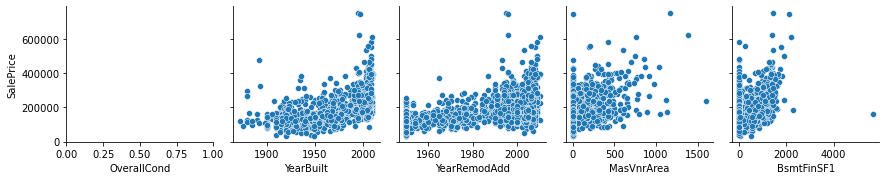

<Figure size 1152x1440 with 0 Axes>

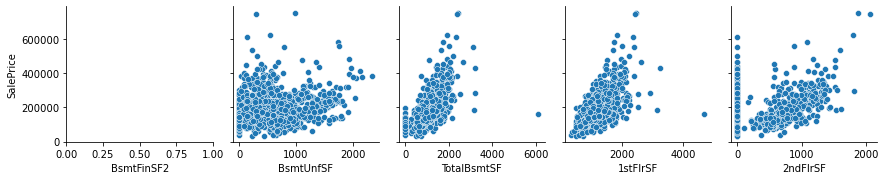

<Figure size 1152x1440 with 0 Axes>

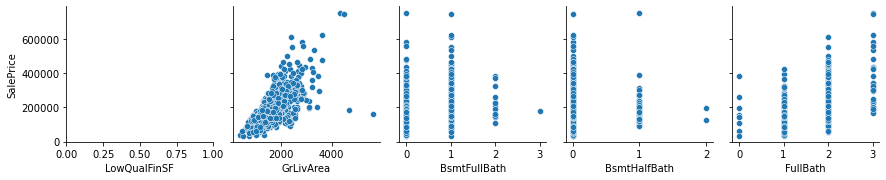

<Figure size 1152x1440 with 0 Axes>

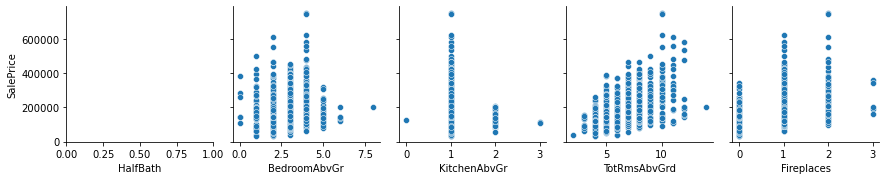

<Figure size 1152x1440 with 0 Axes>

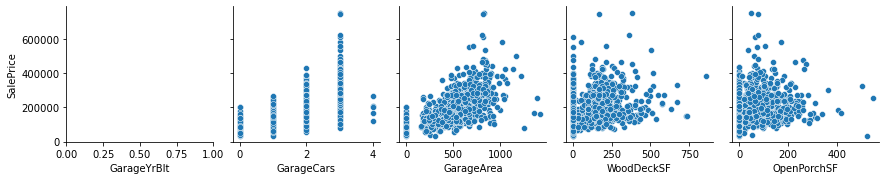

<Figure size 1152x1440 with 0 Axes>

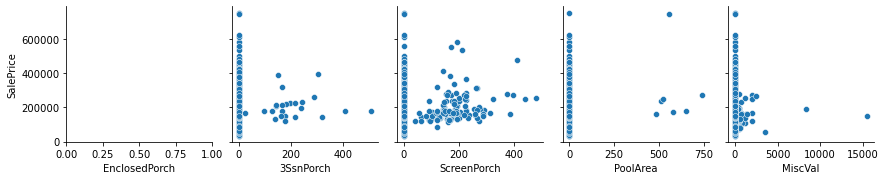

<Figure size 1152x1440 with 0 Axes>

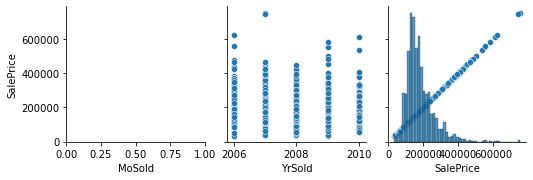

<Figure size 1152x1440 with 0 Axes>

<Figure size 0x180 with 0 Axes>

In [14]:
# Check the relationship with saleprice

for i in range(0, len(num_var),5):
    plt.figure(figsize=(16,20))
    sns.pairplot(data=num_var,
                x_vars=num_var.columns[i:i+5],
                y_vars="SalePrice")  

In [ ]:
# Correlation

corr = df.corr()

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,square=True)

In [ ]:
k= 11
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [ ]:
sns.boxplot(x="OverallQual", y="SalePrice", data=df)

In [ ]:
df["Neighborhood"]

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Neighborhood", data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Missing values

total = num_var.isnull().sum().sort_values(ascending=False)
percent = (num_var.isnull().sum() / num_var.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total,percent], axis=1, 
                      join="outer",
                       keys=["Total Missing", "% of missing"])

In [ ]:
missing_df